## CPMSC 448 Homework 2
### Problem 4

#### Name:
#### PSU id:


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

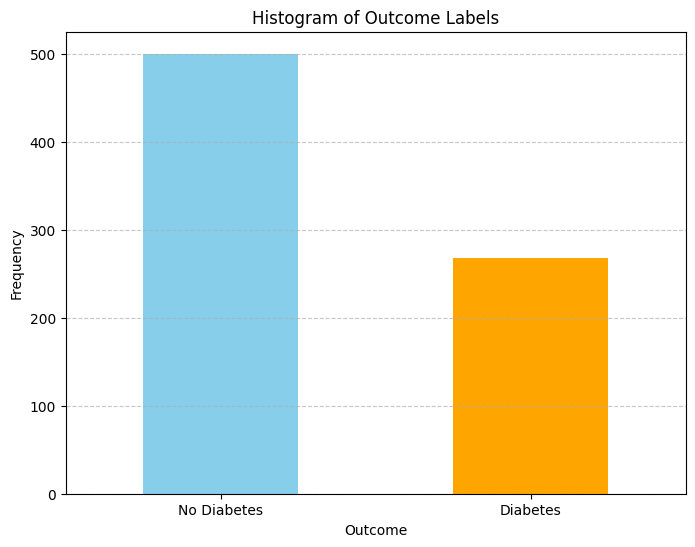

Feature Statistics (Min, Max, Mean):
                             min     max        mean
Pregnancies                0.000   17.00    3.845052
Glucose                    0.000  199.00  120.894531
BloodPressure              0.000  122.00   69.105469
SkinThickness              0.000   99.00   20.536458
Insulin                    0.000  846.00   79.799479
BMI                        0.000   67.10   31.992578
DiabetesPedigreeFunction   0.078    2.42    0.471876
Age                       21.000   81.00   33.240885
Outcome                    0.000    1.00    0.348958


In [11]:
# Timothy Nicholl
#tfn5102

import pandas as pd
import matplotlib.pyplot as plt

# Define the column headers
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Load the data
file_path = "Pima.csv"
data = pd.read_csv(file_path, header=None, names=columns)

# Sanity check
assert data.shape == (768, 9), f"Expected shape (768, 9), but got {data.shape}"

# Calculate statistics for each feature
stats = data.describe().T  # Transpose for easier readability
stats = stats[["min", "max", "mean"]]  # Select only min, max, and mean

# Plot histogram of the target labels
plt.figure(figsize=(8, 6))
data["Outcome"].value_counts().plot(kind="bar", color=["skyblue", "orange"], rot=0)
plt.title("Histogram of Outcome Labels")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.xticks([0, 1], labels=["No Diabetes", "Diabetes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print statistics
print("Feature Statistics (Min, Max, Mean):")
print(stats)


### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

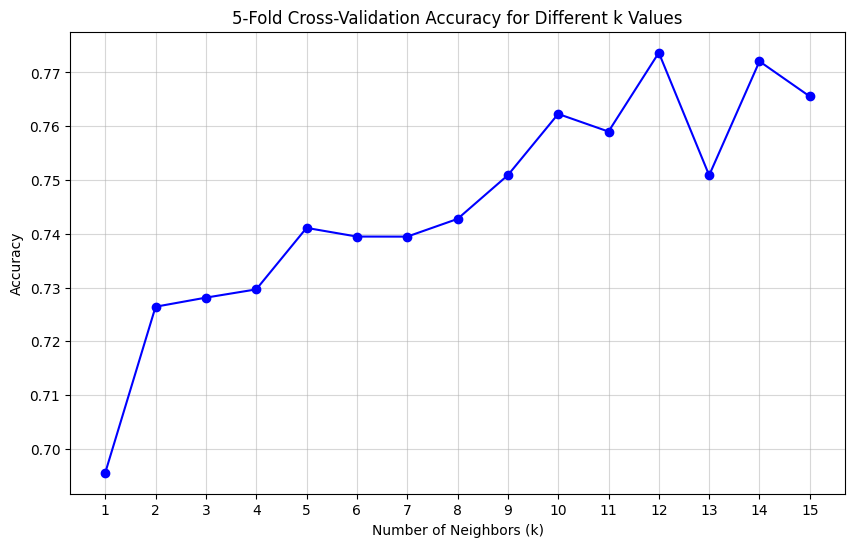

Best number of neighbors (k): 12 with accuracy 0.7737


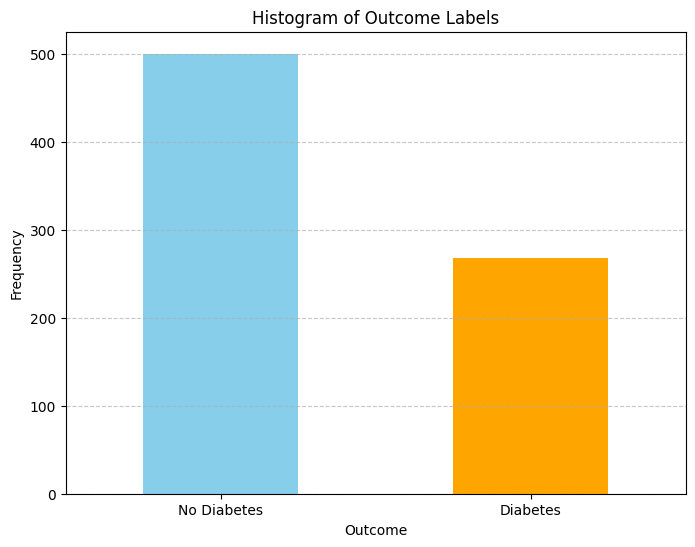

Feature Statistics (Min, Max, Mean):
                             min     max        mean
Pregnancies                0.000   17.00    3.845052
Glucose                    0.000  199.00  120.894531
BloodPressure              0.000  122.00   69.105469
SkinThickness              0.000   99.00   20.536458
Insulin                    0.000  846.00   79.799479
BMI                        0.000   67.10   31.992578
DiabetesPedigreeFunction   0.078    2.42    0.471876
Age                       21.000   81.00   33.240885
Outcome                    0.000    1.00    0.348958


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the column headers
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Load the data
file_path = "Pima.csv"
data = pd.read_csv(file_path, header=None, names=columns)

# Sanity check
assert data.shape == (768, 9), f"Expected shape (768, 9), but got {data.shape}"

# Split data into features and target
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform 5-fold cross-validation to find the best k
k_values = range(1, 16)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o', linestyle='-', color='blue')
plt.title('5-Fold Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(alpha=0.5)
plt.show()

# Print the best k
best_k = k_values[np.argmax(k_scores)]
print(f"Best number of neighbors (k): {best_k} with accuracy {max(k_scores):.4f}")

# Calculate statistics for each feature
stats = data.describe().T  # Transpose for easier readability
stats = stats[["min", "max", "mean"]]  # Select only min, max, and mean

# Plot histogram of the target labels
plt.figure(figsize=(8, 6))
data["Outcome"].value_counts().plot(kind="bar", color=["skyblue", "orange"], rot=0)
plt.title("Histogram of Outcome Labels")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.xticks([0, 1], labels=["No Diabetes", "Diabetes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print statistics
print("Feature Statistics (Min, Max, Mean):")
print(stats)


### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Create NN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
# Predict the labels of test data
yhat = knn.predict(X_test)
# Or, directly check accuracy of our model on the test data
knn.score(X_test, y_test)


0.6948051948051948

### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

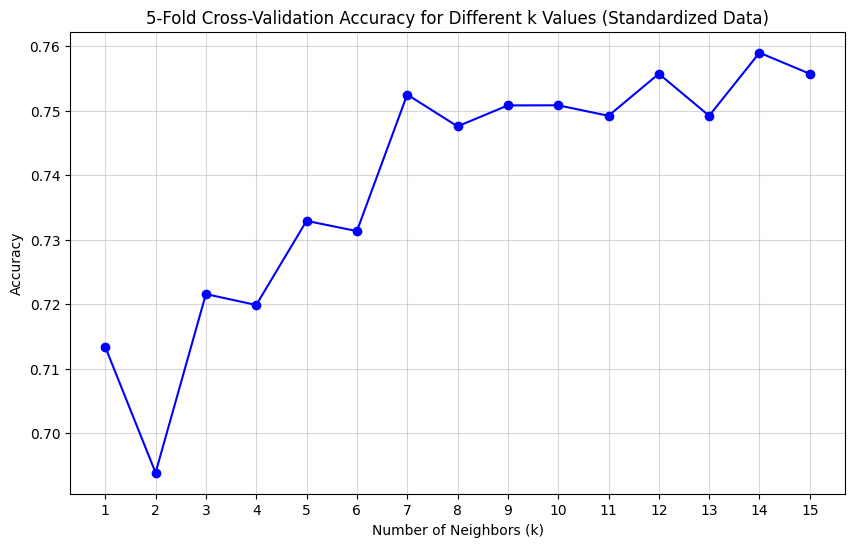

Best number of neighbors (k) after standardization: 14 with accuracy 0.7590


KeyError: ('min', 'max', 'mean')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the column headers
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Load the data
file_path = "Pima.csv"
data = pd.read_csv(file_path, header=None, names=columns)

# Sanity check
assert data.shape == (768, 9), f"Expected shape (768, 9), but got {data.shape}"

# Split data into features and target
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the standardized data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42, stratify=y)

# Perform 5-fold cross-validation to find the best k
k_values = range(1, 16)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o', linestyle='-', color='blue')
plt.title('5-Fold Cross-Validation Accuracy for Different k Values (Standardized Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(alpha=0.5)
plt.show()

# Print the best k
best_k = k_values[np.argmax(k_scores)]
print(f"Best number of neighbors (k) after standardization: {best_k} with accuracy {max(k_scores):.4f}")

# Calculate statistics for each feature
stats = data.describe().T  # Transpose for easier readability
stats = stats["min", "max", "mean"]  # Select only min, max, and mean

# Plot histogram of the target labels
plt.figure(figsize=(8, 6))
data["Outcome"].value_counts().plot(kind="bar", color=["skyblue", "orange"], rot=0)
plt.title("Histogram of Outcome Labels")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.xticks([0, 1], labels=["No Diabetes", "Diabetes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print statistics
print("Feature Statistics (Min, Max, Mean):")
print(stats)
